In [ ]:
'''
Датафреймы 

df_targets_dates_traintest - Метки классов, ретродаты и идентификаторы тестовых объектов: 

df_final_features_traintest - 2 домена вещественных признаков 

df_final_all_sequences_traintest - Последовательности пользовательских состояний для пользователей из основной выборки

df_final_sequences_matrix - Расширенный набор (матрица/граф) последовательностей иных пользователей для обучения моделей 

df_final_features_friends - Cвязь между пользователем из основной выборки и всеми его друзьями (граф) + те же самые два домена признаков для друзей

'''


'\nДатафреймы \n\ndf_targets_dates_traintest - Метки классов, ретродаты и идентификаторы тестовых объектов: \n\ndf_final_features_traintest - 2 домена вещественных признаков \n\ndf_final_all_sequences_traintest - Последовательности пользовательских состояний для пользователей из основной выборки\n\ndf_final_sequences_matrix - Расширенный набор (матрица/граф) последовательностей иных пользователей для обучения моделей \n\ndf_final_features_friends - Cвязь между пользователем из основной выборки и всеми его друзьями (граф) + те же самые два домена признаков для друзей\n\n'

In [1]:
!pip install module_name
!pip install pandas
!pip install networkx
!pip install sklearn
!pip install matplotlib
!pip install dask
!pip install seaborn

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-{torchversion}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-{torchversion}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

import dask.dataframe as df1
import pandas as pd
import torch
import torch_geometric
import torch.nn.functional as F
from torch_geometric.nn import MessagePassing
from torch_geometric.utils import add_self_loops, degree
from torch_geometric.datasets import Planetoid

import networkx as nx
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx
import seaborn as sns
print("ok")

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
ok


In [11]:
g1=pd.read_table('FINAL_TARGETS_DATES_TRAINTEST.tsv')
#data получения 
g1

,CLIENT_ID,RETRO_DT,TARGET
0,1011725,20210501,0
1,1018784,20210501,1
2,1021812,20210501,0
3,1024003,20210501,0
4,1025140,20210501,test
...,...,...,...
159285,72633,20210731,0
159286,72634,20210731,1
159287,72641,20210731,0
159288,72642,20210731,test


In [3]:
g1=g1.loc[g1['TARGET']!='test' ]
g1

,CLIENT_ID,RETRO_DT,TARGET
0,1011725,20210501,0
1,1018784,20210501,1
2,1021812,20210501,0
3,1024003,20210501,0
5,1026390,20210501,1
...,...,...,...
159283,72630,20210731,0
159285,72633,20210731,0
159286,72634,20210731,1
159287,72641,20210731,0


In [12]:
b=pd.read_table('FINAL_ALL_SEQUENCES_TRAINTEST.tsv')
b

,CLIENT_ID,SEQUENCE
0,1000100,"['e84b0f471b8e8f4aecc81eb27b16c092', '9a7670be..."
1,1000121,"['9804a8d70c5e8c26830bdafe2c2db49c', '9ca02fb0..."
2,1000131,"['b496d19eb25556bd64e481d11b6f7dd6', 'eb727f97..."
3,1000132,"['467a38fe36ef666e264823387f66f3c8', 'e0494409..."
4,100013,"['b496d19eb25556bd64e481d11b6f7dd6', 'fc18cab3..."
...,...,...
123702,999735,"['c734cde7f7ab57d48debbd587f4cf126', 'fdc759e2..."
123703,999783,"['1669b50f343dd2e888c2ef6e2a218b23', '27317357..."
123704,99978,"['5f82488fb41f39bb377b55eb85837dba', '6d69d039..."
123705,999791,"['6a59be6dae2918aa5a0d79ac0cbc39ef', 'dcfd13a9..."


In [33]:
h=pd.read_table('FINAL_FEATURES_FRIENDS.tsv')
h

,CLIENT_ID,i1047,i1048,i1056,i1058,i1059,i1060,i1065,i1066,i1067,...,u8=18,u8=19,u8=2,u8=20,u8=21,u8=6,u8=7,u8=8,u8=9,FRIEND_ID
0,999819,0.0,0.0,8.0,1.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99981973.0
1,999819,0.0,45.0,41.0,0.0,18.0,2.0,17.0,0.0,6.0,...,0.0,29.0,0.0,0.0,133.0,0.0,0.0,0.0,0.0,99981949.0
2,999819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99981979.0
3,999819,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99981939.0
4,999819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99981975.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893244,1517034,0.0,24.0,18.0,0.0,0.0,0.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151703416.0
893245,1517034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151703432.0
893246,1517034,0.0,0.0,12.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151703442.0
893247,1517034,0.0,0.0,33.0,3.0,0.0,18.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151703410.0


In [16]:
a=pd.read_table('FINAL_FEATURES_FRIENDS.tsv')
a['friendlevel']=a['FRIEND_ID'] -a['CLIENT_ID']*100
a

,CLIENT_ID,i1047,i1048,i1056,i1058,i1059,i1060,i1065,i1066,i1067,...,u8=19,u8=2,u8=20,u8=21,u8=6,u8=7,u8=8,u8=9,FRIEND_ID,friendlevel
0,999819,0.0,0.0,8.0,1.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99981973.0,73.0
1,999819,0.0,45.0,41.0,0.0,18.0,2.0,17.0,0.0,6.0,...,29.0,0.0,0.0,133.0,0.0,0.0,0.0,0.0,99981949.0,49.0
2,999819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99981979.0,79.0
3,999819,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99981939.0,39.0
4,999819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99981975.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893244,1517034,0.0,24.0,18.0,0.0,0.0,0.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151703416.0,16.0
893245,1517034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151703432.0,32.0
893246,1517034,0.0,0.0,12.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151703442.0,42.0
893247,1517034,0.0,0.0,33.0,3.0,0.0,18.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151703410.0,10.0


In [17]:
a['i1047'].mean()
a['i1056'].mean()
a['i1059'].mean()
a['u8=21'].mean()

74.99000949344415

In [24]:
c=a.loc[a['friendlevel'] <10 ] 
c=c.loc[ c['friendlevel'] >0]
c

,CLIENT_ID,i1047,i1048,i1056,i1058,i1059,i1060,i1065,i1066,i1067,...,u8=19,u8=2,u8=20,u8=21,u8=6,u8=7,u8=8,u8=9,FRIEND_ID,friendlevel
8,999819,0.0,0.0,9.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99981908.0,8.0
16,999819,0.0,1.0,24.0,0.0,6.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99981904.0,4.0
22,999819,0.0,173.0,152.0,6.0,0.0,8.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99981909.0,9.0
28,999819,0.0,0.0,719.0,5.0,0.0,115.0,104.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99981902.0,2.0
52,999819,0.0,0.0,7.0,0.0,0.0,1.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99981905.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893191,1517035,0.0,0.0,305.0,0.0,10.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151703505.0,5.0
893201,1517035,0.0,0.0,19.0,0.0,0.0,2.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151703507.0,7.0
893204,1517035,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151703508.0,8.0
893207,1517035,0.0,0.0,459.0,0.0,0.0,0.0,34.0,0.0,0.0,...,0.0,0.0,0.0,2035.0,0.0,0.0,0.0,0.0,151703501.0,1.0


In [34]:
p=pd.merge(g1,h,on='CLIENT_ID',how='left')
p

,CLIENT_ID,RETRO_DT,TARGET,i1047,i1048,i1056,i1058,i1059,i1060,i1065,...,u8=18,u8=19,u8=2,u8=20,u8=21,u8=6,u8=7,u8=8,u8=9,FRIEND_ID
0,1011725,20210501,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1018784,20210501,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1021812,20210501,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1024003,20210501,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1025140,20210501,test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040918,72633,20210731,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1040919,72634,20210731,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1040920,72641,20210731,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1040921,72642,20210731,test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
c['TARGET'] = p['TARGET']
c

,CLIENT_ID,i1047,i1048,i1056,i1058,i1059,i1060,i1065,i1066,i1067,...,u8=2,u8=20,u8=21,u8=6,u8=7,u8=8,u8=9,FRIEND_ID,friendlevel,TARGET
8,999819,0.0,0.0,9.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99981908.0,8.0,test
16,999819,0.0,1.0,24.0,0.0,6.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99981904.0,4.0,0
22,999819,0.0,173.0,152.0,6.0,0.0,8.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99981909.0,9.0,0
28,999819,0.0,0.0,719.0,5.0,0.0,115.0,104.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99981902.0,2.0,test
52,999819,0.0,0.0,7.0,0.0,0.0,1.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99981905.0,5.0,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893191,1517035,0.0,0.0,305.0,0.0,10.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151703505.0,5.0,NaN
893201,1517035,0.0,0.0,19.0,0.0,0.0,2.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151703507.0,7.0,NaN
893204,1517035,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151703508.0,8.0,NaN
893207,1517035,0.0,0.0,459.0,0.0,0.0,0.0,34.0,0.0,0.0,...,0.0,0.0,2035.0,0.0,0.0,0.0,0.0,151703501.0,1.0,NaN


In [28]:
c['TARGET'].fillna(p['TARGET'])
c

,CLIENT_ID,i1047,i1048,i1056,i1058,i1059,i1060,i1065,i1066,i1067,...,u8=2,u8=20,u8=21,u8=6,u8=7,u8=8,u8=9,FRIEND_ID,friendlevel,TARGET
8,999819,0.0,0.0,9.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99981908.0,8.0,test
16,999819,0.0,1.0,24.0,0.0,6.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99981904.0,4.0,0
22,999819,0.0,173.0,152.0,6.0,0.0,8.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99981909.0,9.0,0
28,999819,0.0,0.0,719.0,5.0,0.0,115.0,104.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99981902.0,2.0,test
52,999819,0.0,0.0,7.0,0.0,0.0,1.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99981905.0,5.0,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893191,1517035,0.0,0.0,305.0,0.0,10.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151703505.0,5.0,NaN
893201,1517035,0.0,0.0,19.0,0.0,0.0,2.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151703507.0,7.0,NaN
893204,1517035,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151703508.0,8.0,NaN
893207,1517035,0.0,0.0,459.0,0.0,0.0,0.0,34.0,0.0,0.0,...,0.0,0.0,2035.0,0.0,0.0,0.0,0.0,151703501.0,1.0,NaN


In [17]:
p=p.loc[p['TARGET']!='test' ]
p

,CLIENT_ID,RETRO_DT,TARGET,i1047,i1048,i1056,i1058,i1059,i1060,i1065,...,u8=19,u8=2,u8=20,u8=21,u8=6,u8=7,u8=8,u8=9,FRIEND_ID,friendlevel
0,1011725,20210501,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1018784,20210501,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1021812,20210501,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1024003,20210501,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1026390,20210501,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197922,72630,20210731,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197923,72633,20210731,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197924,72634,20210731,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197925,72641,20210731,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
import random
p['i1047']=p['i1047'].fillna(random.uniform(0.024,0.03))
p['i1056']=p['i1056'].fillna(random.uniform(65.71033049015448,67))
p['i1059']=p['i1059'].fillna(random.uniform(2.4397709933064577,2.6))
p['u8=21']=p['u8=21'].fillna(random.uniform(74.99000949344415,75.87))
p

,CLIENT_ID,RETRO_DT,TARGET,i1047,i1048,i1056,i1058,i1059,i1060,i1065,...,u8=19,u8=2,u8=20,u8=21,u8=6,u8=7,u8=8,u8=9,FRIEND_ID,friendlevel
0,1011725,20210501,0,0.025522,NaN,65.987215,NaN,2.472979,NaN,NaN,...,NaN,NaN,NaN,75.067438,NaN,NaN,NaN,NaN,NaN,NaN
1,1018784,20210501,1,0.025522,NaN,65.987215,NaN,2.472979,NaN,NaN,...,NaN,NaN,NaN,75.067438,NaN,NaN,NaN,NaN,NaN,NaN
2,1021812,20210501,0,0.025522,NaN,65.987215,NaN,2.472979,NaN,NaN,...,NaN,NaN,NaN,75.067438,NaN,NaN,NaN,NaN,NaN,NaN
3,1024003,20210501,0,0.025522,NaN,65.987215,NaN,2.472979,NaN,NaN,...,NaN,NaN,NaN,75.067438,NaN,NaN,NaN,NaN,NaN,NaN
4,1026390,20210501,1,0.025522,NaN,65.987215,NaN,2.472979,NaN,NaN,...,NaN,NaN,NaN,75.067438,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197922,72630,20210731,0,0.025522,NaN,65.987215,NaN,2.472979,NaN,NaN,...,NaN,NaN,NaN,75.067438,NaN,NaN,NaN,NaN,NaN,NaN
197923,72633,20210731,0,0.025522,NaN,65.987215,NaN,2.472979,NaN,NaN,...,NaN,NaN,NaN,75.067438,NaN,NaN,NaN,NaN,NaN,NaN
197924,72634,20210731,1,0.025522,NaN,65.987215,NaN,2.472979,NaN,NaN,...,NaN,NaN,NaN,75.067438,NaN,NaN,NaN,NaN,NaN,NaN
197925,72641,20210731,0,0.025522,NaN,65.987215,NaN,2.472979,NaN,NaN,...,NaN,NaN,NaN,75.067438,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
testfich = ['RETRO_DT']
X = g1[testfich]
from sklearn.model_selection import train_test_split
forest_model = RandomForestRegressor(random_state=1)
y = g1['TARGET']
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)

print(mean_absolute_eror(val_y,melb_preds))


ValueError: could not convert string to float: 'test'

In [ ]:
testfich = ['i1047', 'i1056','i1059','u8=21' ]
X = p[testfich]
from sklearn.model_selection import train_test_split
forest_model = RandomForestRegressor(random_state=1)
y = p['TARGET']
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)

print(mean_absolute_eror(val_y,melb_preds))


KeyError: "None of [Index(['i1047', 'i1056', 'i1059', 'u8=21'], dtype='object')] are in the [columns]"

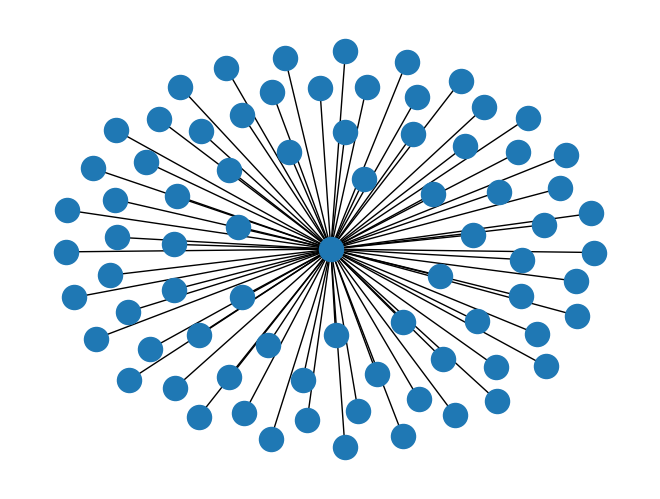

In [22]:



graph = nx.from_pandas_edgelist(a[:76], 'CLIENT_ID', 'FRIEND_ID')
nx.draw(graph)

In [ ]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#необходимо добавить в  датасет c target из p  ,а после разделить его на тестовую и валидационную и обучить на этом регресси